# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 6</font>

## Projeto 1 - Análise Exploratória de Dados com Python e Linguagem SQL
### Camila Teixeira

Neste projeto faremos uma análise exploratória de dados usando Linguagem Python, Linguagem SQL e Banco de Dados SQLite. 

Usaremos dados públicos e reais sobre filmes disponíveis no <a href="https://www.imdb.com/interfaces/">IMDB</a>.

Ao aplicar Análise Exploratória de Dados pretende-se responder a estas 10 perguntas:

- 1- Quais São as Categorias de Filmes Mais Comuns no IMDB?
- 2- Qual o Número de Títulos Por Gênero?
- 3- Qual a Mediana de Avaliação dos Filmes Por Gênero?
- 4- Qual a Mediana de Avaliação dos Filmes Em Relação ao Ano de Estréia?
- 5- Qual o Número de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia?
- 6- Qual o Filme Com Maior Tempo de Duração? Calcule os Percentis.
- 7- Qual a Relação Entre Duração e Gênero?
- 8- Qual o Número de Filmes Produzidos Por País?
- 9- Quais São os Top 10 Melhores Filmes?
- 10- Quais São os Top 10 Piores Filmes?

## Instalando e Carregando Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.7


In [2]:
# Instalar o pacote: https://pypi.org/project/imdb-sqlite/

!pip install -q imdb-sqlite

Agora executamos o pacote para download dos datasets.

In [3]:
# Instalar o pacote: https://pypi.org/project/pycountry/

!pip install -q pycountry

In [4]:
!pip install numpy

In [6]:
# Imports

import re #expressões regulares
import time #para medir o tempo de execução
import sqlite3 #para manipular bancos SQLite em python
import pycountry

#Para manipulação de dados
import numpy as np
import pandas as pd

#Para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

#Para Machine Learning
from sklearn.feature_extraction.text import CountVectorizer

#Para filtrar warnings
import warnings
warnings.filterwarnings("ignore")

#Para definir o tema dos gráficos
sns.set_theme(style = "whitegrid")

## Carregando os Dados

Primeiro temos que baixar os dados!

In [7]:
%%timeit #para medir o tempo de execução nesta celula
!imdb-sqlite

2022-08-08 19:07:30,192 GET https://datasets.imdbws.com/name.basics.tsv.gz -> downloads\name.basics.tsv.gz
2022-08-08 19:08:45,595 GET https://datasets.imdbws.com/title.basics.tsv.gz -> downloads\title.basics.tsv.gz
2022-08-08 19:09:40,448 GET https://datasets.imdbws.com/title.akas.tsv.gz -> downloads\title.akas.tsv.gz
2022-08-08 19:11:11,860 GET https://datasets.imdbws.com/title.principals.tsv.gz -> downloads\title.principals.tsv.gz
2022-08-08 19:14:01,582 GET https://datasets.imdbws.com/title.episode.tsv.gz -> downloads\title.episode.tsv.gz
2022-08-08 19:14:21,750 GET https://datasets.imdbws.com/title.ratings.tsv.gz -> downloads\title.ratings.tsv.gz
2022-08-08 19:14:25,466 Populating database: imdb.db
2022-08-08 19:14:25,472 Applying schema
2022-08-08 19:14:25,482 Importing file: downloads\name.basics.tsv.gz
2022-08-08 19:14:25,483 Reading number of rows ...
2022-08-08 19:14:32,151 Inserting rows into table: people

 67%|######6   | 7902230/11830866 [02:34<01:10, 55392.21 rows/s]


100%|##########| 11830866/11830866 [03:46<00:00, 52131.07 rows/s]
2022-08-08 19:18:19,138 Importing file: downloads\title.basics.tsv.gz
2022-08-08 19:18:19,139 Reading number of rows ...
2022-08-08 19:18:24,039 Inserting rows into table: titles

 15%|#4        | 1363670/9128050 [00:28<02:47, 46332.19 rows/s]


 75%|#######4  | 6819744/9128050 [02:27<00:49, 46174.29 rows/s]


2022-08-08 19:53:19,491 DB already exists: (imdb.db). Refusing to modify. Exiting 75%|#######4  | 6824413/9128050 [02:27<00:49, 46198.53 rows/s]

 88%|########8 | 8040453/9128050 [02:53<00:27, 39627.75 rows/s]


100%|##########| 9128050/9128050 [03:17<00:00, 46197.69 rows/s]
2022-08-08 19:21:41,632 Importing file: downloads\title.akas.tsv.gz
2022-08-08 19:21:41,632 Reading number of rows ...
2022-08-08 19:21:51,020 Inserting rows into table: akas

 10%|#         | 3289957/32814203 [00:57<08:32, 57651.17 rows/s]


 14%|#3        | 4499473/32814203 [01:18<07:59, 59039.91 rows/s]


 31%|###1      | 10308814/32814203 [03:00<06:29, 57839.94 rows/s]


 33%|###2      | 10726914/32814203 [03:07<06:22, 57819.88 rows/s]
2022-08-08 19:53:19,924 DB already exists: (imdb.db). Refusing to modify. Exiting
 48%|####8     | 15878296/32814203 [04:38<04:47, 58838.84 rows/s]


 52%|#####2    | 17164227/32814203 [05:00<04:36, 56524.37 rows/s]


 68%|######7   | 22265184/32814203 [06:30<03:23, 51830.98 rows/s]


 71%|#######   | 23281430/32814203 [06:51<03:59, 39802.09 rows/s]


 76%|#######5  | 24894422/32814203 [07:20<02:18, 57251.86 rows/s]
2022-08-08 19:53:20,332 DB already exists: (imdb.db). Refusing to modify. Exiting 76%|#######5  | 24900148/32814203 [07:20<02:18, 57095.18 rows/s]

 76%|#######6  | 25031480/32814203 [07:23<02:16, 56922.70 rows/s]


 84%|########4 | 27719059/32814203 [08:10<01:26, 58619.69 rows/s]


 88%|########7 | 28725559/32814203 [08:28<01:12, 56372.44 rows/s]


 94%|#########3| 30817873/32814203 [09:05<00:35, 55532.43 rows/s]


 98%|#########8| 32251070/32814203 [09:30<00:10, 54661.36 rows/s]


100%|##########| 32814203/32814203 [09:39<00:00, 56582.99 rows/s]
2022-08-08 19:31:30,955 Importing file: downloads\title.principals.tsv.gz
2022-08-08 19:31:30,956 Reading number of rows ...
2022-08-08 19:31:44,837 Inserting rows into table: crew

  4%|3         | 2033889/51488337 [00:29<12:18, 66955.69 rows/s]


  7%|7         | 3769826/51488337 [00:55<11:21, 70038.01 rows/s]


  8%|7         | 3938382/51488337 [00:58<11:33, 68574.93 rows/s]
2022-08-08 19:53:20,745 DB already exists: (imdb.db). Refusing to modify. Exiting  8%|7         | 3945242/51488337 [00:58<11:35, 68392.06 rows/s]

 10%|#         | 5195962/51488337 [01:16<11:15, 68563.25 rows/s]


 14%|#3        | 7073470/51488337 [01:44<10:37, 69651.68 rows/s]


 18%|#7        | 9241177/51488337 [02:16<10:24, 67656.88 rows/s]


 22%|##2       | 11372451/51488337 [02:48<09:58, 67002.38 rows/s]


 26%|##6       | 13449251/51488337 [03:19<09:29, 66852.46 rows/s]


 30%|##9       | 15312912/51488337 [03:46<09:01, 66807.21 rows/s]


 33%|###3      | 17152805/51488337 [04:14<08:27, 67717.68 rows/s]


 37%|###6      | 19000814/51488337 [04:41<07:59, 67701.67 rows/s]


 40%|####      | 20661161/51488337 [05:06<07:37, 67402.82 rows/s]2022-08-08 19:53:21,221 DB already exists: (imdb.db). Refusing to modify. Exiting

 41%|####      | 21048401/51488337 [05:12<08:55, 56833.54 rows/s]


 45%|####4     | 23163910/51488337 [05:43<06:50, 69073.18 rows/s]


 49%|####8     | 25099964/51488337 [06:11<06:29, 67754.57 rows/s]


 53%|#####2    | 27128120/51488337 [06:42<06:02, 67248.73 rows/s]


 56%|#####5    | 28660267/51488337 [07:04<05:40, 67062.49 rows/s]


 59%|#####9    | 30414906/51488337 [07:30<05:16, 66662.09 rows/s]


 62%|######1   | 31721201/51488337 [07:50<05:42, 57681.39 rows/s]


 63%|######3   | 32632396/51488337 [08:04<04:42, 66656.44 rows/s]


 68%|######7   | 34966932/51488337 [08:39<04:07, 66784.73 rows/s]


 71%|#######   | 36346028/51488337 [08:59<03:52, 65119.09 rows/s]


 74%|#######3  | 37976880/51488337 [09:23<03:21, 67142.25 rows/s]


 76%|#######6  | 39388285/51488337 [09:44<02:57, 68292.11 rows/s]2022-08-08 19:53:21,714 DB already exists: (imdb.db). Refusing to modify. Exiting

 77%|#######6  | 39416322/51488337 [09:44<02:54, 69139.12 rows/s]


 80%|########  | 41446463/51488337 [10:14<02:29, 67350.58 rows/s]


 82%|########2 | 42312615/51488337 [10:27<02:16, 67147.15 rows/s]


 85%|########4 | 43550210/51488337 [10:46<01:57, 67582.23 rows/s]


 88%|########7 | 45308146/51488337 [11:12<01:33, 66142.38 rows/s]


 92%|#########2| 47489326/51488337 [11:45<00:59, 66819.99 rows/s]


 95%|#########5| 49013276/51488337 [12:07<00:37, 66274.09 rows/s]


 97%|#########7| 50047793/51488337 [12:23<00:21, 68272.03 rows/s]


 99%|#########9| 51194702/51488337 [12:39<00:04, 67041.95 rows/s]


100%|##########| 51488337/51488337 [12:44<00:00, 67368.95 rows/s]
2022-08-08 19:44:29,116 Importing file: downloads\title.episode.tsv.gz
2022-08-08 19:44:29,116 Reading number of rows ...
2022-08-08 19:44:30,351 Inserting rows into table: episodes

 30%|##9       | 2056504/6872335 [00:26<01:03, 75717.87 rows/s]

478 ms ± 88 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)



 54%|#####3    | 3685949/6872335 [00:47<00:40, 77978.86 rows/s]2022-08-08 19:53:22,143 DB already exists: (imdb.db). Refusing to modify. Exiting

 76%|#######5  | 5210761/6872335 [01:07<00:21, 77276.21 rows/s]


100%|##########| 6872335/6872335 [01:28<00:00, 77618.86 rows/s]
2022-08-08 19:45:58,895 Importing file: downloads\title.ratings.tsv.gz
2022-08-08 19:45:58,895 Reading number of rows ...
2022-08-08 19:45:59,084 Inserting rows into table: ratings

 54%|#####3    | 675014/1259598 [00:09<00:08, 68846.29 rows/s]


100%|##########| 1259598/1259598 [00:18<00:00, 68517.35 rows/s]
2022-08-08 19:46:17,472 Creating table indices ...
2022-08-08 19:53:18,802 Import successful


In [8]:
# Conecta no banco de dados
conn = sqlite3.connect("imdb.db")

In [9]:
# Extrai a lista de tabelas
tabelas = pd.read_sql_query("SELECT NAME AS 'Table_Name' FROM sqlite_master WHERE type = 'table'", conn)

In [10]:
# Tipo do objeto
type(tabelas)

pandas.core.frame.DataFrame

In [11]:
# Visualiza o resultado
tabelas.head()

,Table_Name
0,people
1,titles
2,akas
3,crew
4,episodes


In [12]:
# Vamos converter o dataframe em uma lista
tabelas = tabelas["Table_Name"].values.tolist()

In [13]:
# Vamos percorrer a lista de tabelas no banco de dados e extrair o esquema de cada uma
for tabela in tabelas:
    consulta = "PRAGMA TABLE_INFO({})".format(tabela) #retorna uma linha para cada coluna na tabela nomeada.
    resultado = pd.read_sql_query(consulta, conn) #retorna um DataFrame correspondente ao conjunto de resultados da string de consulta.
    print("Esquema da tabela:", tabela)
    display(resultado)
    print("-"*100)
    print("\n")

Esquema da tabela: people


,cid,name,type,notnull,dflt_value,pk
0,0,person_id,VARCHAR,0,None,1
1,1,name,VARCHAR,0,None,0
2,2,born,INTEGER,0,None,0
3,3,died,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: titles


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,type,VARCHAR,0,None,0
2,2,primary_title,VARCHAR,0,None,0
3,3,original_title,VARCHAR,0,None,0
4,4,is_adult,INTEGER,0,None,0
5,5,premiered,INTEGER,0,None,0
6,6,ended,INTEGER,0,None,0
7,7,runtime_minutes,INTEGER,0,None,0
8,8,genres,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: akas


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,title,VARCHAR,0,None,0
2,2,region,VARCHAR,0,None,0
3,3,language,VARCHAR,0,None,0
4,4,types,VARCHAR,0,None,0
5,5,attributes,VARCHAR,0,None,0
6,6,is_original_title,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: crew


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,person_id,VARCHAR,0,None,0
2,2,category,VARCHAR,0,None,0
3,3,job,VARCHAR,0,None,0
4,4,characters,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: episodes


,cid,name,type,notnull,dflt_value,pk
0,0,episode_title_id,INTEGER,0,None,0
1,1,show_title_id,INTEGER,0,None,0
2,2,season_number,INTEGER,0,None,0
3,3,eposide_number,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: ratings


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,rating,INTEGER,0,None,0
2,2,votes,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------




> Agora começamos a Análise Exploratória dos Dados.

## 1- Quais são as categorias de filmes mais comuns no IMDB?

Quais são os principais tipos (categorias) dos títulos (filmes)?

In [14]:
# Cria a consulta SQL
consulta1 = '''SELECT type, COUNT(*) AS COUNT FROM titles GROUP BY type''' 

#a partir da table Titles vai retornar quantos filmes (Count) tem nas categorias (Type)  e agrupar por type

In [15]:
# Extrai o resultado
#Retorna um DataFrame correspondente ao conjunto de resultados da string de consulta.
resultado1 = pd.read_sql_query(consulta1, conn)

In [16]:
# Visualiza o resultado
display(resultado1)

,type,COUNT
0,movie,617694
1,short,882680
2,tvEpisode,6872645
3,tvMiniSeries,44602
4,tvMovie,137086
5,tvPilot,2
6,tvSeries,229214
7,tvShort,10629
8,tvSpecial,37864
9,video,263863


In [17]:
# Vamos calcular o percentual para cada tipo e criar uma coluna chamada percentual
resultado1['percentual'] = (resultado1['COUNT'] / resultado1['COUNT'].sum()) * 100

In [18]:
# Visualiza o resultado
display(resultado1)

,type,COUNT,percentual
0,movie,617694,6.766987
1,short,882680,9.669973
2,tvEpisode,6872645,75.291492
3,tvMiniSeries,44602,0.488626
4,tvMovie,137086,1.501810
5,tvPilot,2,0.000022
6,tvSeries,229214,2.511095
7,tvShort,10629,0.116443
8,tvSpecial,37864,0.414809
9,video,263863,2.890683


In [19]:
# Vamos criar um gráfico com apenas 4 categorias:
# As 3 categorias com mais títulos e 1 categoria com todo o restante

# Cria um dicionário vazio
others = {}

# Filtra o percentual em 5% e soma o total
others['COUNT'] = resultado1[resultado1['percentual'] < 5]['COUNT'].sum()

# Grava o percentual
others['percentual'] = resultado1[resultado1['percentual'] < 5]['percentual'].sum()

# Ajusta o nome
others['type'] = 'others'

In [20]:
# Visualiza
others

{'COUNT': 755031, 'percentual': 8.271547592311611, 'type': 'others'}

In [21]:
# Filtra o dataframe de resultado
resultado1 = resultado1[resultado1['percentual'] > 5]

In [22]:
# Append com o dataframe de outras categorias
resultado1 = resultado1.append(others, ignore_index = True)

In [23]:
# Classifica o DataFrame pelo rótulo Count 
resultado1 = resultado1.sort_values(by = 'COUNT', ascending = False)

In [24]:
# Visualiza
resultado1.head()

,type,COUNT,percentual
2,tvEpisode,6872645,75.291492
1,short,882680,9.669973
3,others,755031,8.271548
0,movie,617694,6.766987


In [25]:
# Ajustar a legenda (list comprehension)
labels = [str(resultado1['type'][i])+' '+'['+str(round(resultado1['percentual'][i],2)) +'%'+']' for i in resultado1.index]

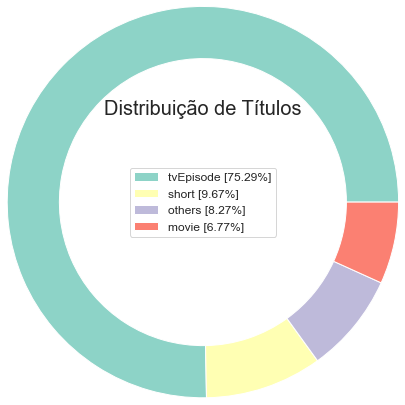

In [30]:
# Plot

# Mapa de cores
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
cs = cm.Set3(np.arange(100))

# Cria a figura
f = plt.figure(figsize=(6, 3))

# Pie Plot
plt.pie(resultado1['COUNT'], labeldistance = 1, radius = 3, colors = cs, wedgeprops = dict(width = 0.8))
plt.legend(labels = labels, loc = 'center', prop = {'size':12})
plt.title("Distribuição de Títulos", loc = 'Center', fontdict = {'fontsize':20,'fontweight':20})
plt.show()

## 2- Qual o número de títulos por gênero?

Vamos calcular o número de filmes por gênero e entregar o resultado em valor percentual.

In [31]:
# Cria a consulta SQL
consulta2 = '''SELECT genres, COUNT(*) FROM titles WHERE type = 'movie' GROUP BY genres''' 

#Vai trazer o total de registros agrupados por gênero dos títulos que são do tipo movie. 

In [32]:
# Resultado
resultado2 = pd.read_sql_query(consulta2, conn)

In [33]:
# Visualiza o resultado
display(resultado2)

,genres,COUNT(*)
0,Action,14137
1,"Action,Adult",11
2,"Action,Adult,Adventure",2
3,"Action,Adult,Comedy",6
4,"Action,Adult,Crime",9
...,...,...
1461,"Thriller,Western",43
1462,War,1311
1463,"War,Western",14
1464,Western,5083


In [34]:
# Converte as strings para minúsculo
resultado2['genres'] = resultado2['genres'].str.lower().values

In [35]:
# Remove valores NA (ausentes)
temp = resultado2['genres'].dropna()

Usamos o Countvectorizer para converter a coluna de gêneros em um vetor one-hot encoded para contar o número de filmes em cada gênero.

![title](imagens/one-hot.png)

In [36]:
# Vamos criar um vetor usando expressão regular para filtrar as strings

# https://docs.python.org/3.8/library/re.html

padrao = '(?u)\\b[\\w-]+\\b'

# (?u) aceita Unicode
# \\b procura a palavra exata
# [\\w-]+ qualquer caracter alfanumérico e o -

# CountVectorizer converte uma tabela em uma matriz de token (matriz esparsa)
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

vetor = CountVectorizer(token_pattern = padrao, analyzer = 'word').fit(temp)

In [37]:
type(vetor)

sklearn.feature_extraction.text.CountVectorizer

In [38]:
# Aplica a vetorização ao dataset sem valores NA
bag_generos = vetor.transform(temp)

In [39]:
type(bag_generos)

scipy.sparse.csr.csr_matrix

In [40]:
# Retorna gêneros únicos
generos_unicos =  vetor.get_feature_names()

In [41]:
# Cria o dataframe de gêneros
#.todense() retorna uma matriz

generos = pd.DataFrame(bag_generos.todense(), columns = generos_unicos, index = temp.index)

In [42]:
# Visualiza
generos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1466 entries, 0 to 1465
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   action       1466 non-null   int64
 1   adult        1466 non-null   int64
 2   adventure    1466 non-null   int64
 3   animation    1466 non-null   int64
 4   biography    1466 non-null   int64
 5   comedy       1466 non-null   int64
 6   crime        1466 non-null   int64
 7   documentary  1466 non-null   int64
 8   drama        1466 non-null   int64
 9   family       1466 non-null   int64
 10  fantasy      1466 non-null   int64
 11  film-noir    1466 non-null   int64
 12  game-show    1466 non-null   int64
 13  history      1466 non-null   int64
 14  horror       1466 non-null   int64
 15  music        1466 non-null   int64
 16  musical      1466 non-null   int64
 17  mystery      1466 non-null   int64
 18  n            1466 non-null   int64
 19  news         1466 non-null   int64
 20  reality-

In [43]:
# Drop da coluna n
generos = generos.drop(columns = 'n', axis = 0)

In [44]:
# Calcula o percentual
#pd.Series() cria um array unidimensional que contém dados de qualquer tipo

generos_percentual = 100 * pd.Series(generos.sum()).sort_values(ascending = False) / generos.shape[0]

In [45]:
# Visualiza
generos_percentual.head(10)

drama          17.939973
comedy         16.984993
documentary    15.825375
adventure      14.870396
action         14.529332
romance        13.301501
crime          13.028649
mystery        12.414734
thriller       12.278308
horror         12.210095
dtype: float64

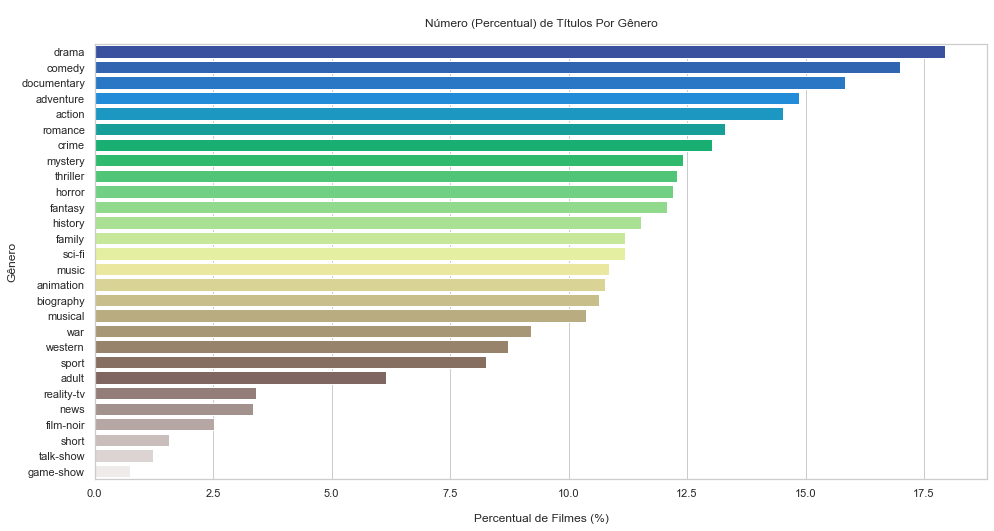

In [46]:
# Plot
plt.figure(figsize = (16,8))
sns.barplot(x = generos_percentual.values, y = generos_percentual.index, orient = "h", palette = "terrain")
plt.ylabel('Gênero')             
plt.xlabel("\nPercentual de Filmes (%)")
plt.title('\nNúmero (Percentual) de Títulos Por Gênero\n')
plt.show()

## 3- Qual a mediana de avaliação dos filmes por gênero?

In [47]:
# Consulta SQL
consulta3 = '''
            SELECT rating, genres FROM 
            ratings JOIN titles ON ratings.title_id = titles.title_id 
            WHERE premiered <= 2022 AND type = 'movie'
            ''' 

# Trazer rating e genres da junção das tabelas rating e titles através do id em cada tabela filtrando por ano da premier do 
# filme e por tipo movie.

In [48]:
# Resultado
resultado3 = pd.read_sql_query(consulta3, conn)

In [49]:
# Visualiza
display(resultado3)

,rating,genres
0,5.3,Romance
1,4.5,\N
2,6.0,"Action,Adventure,Biography"
3,4.7,Drama
4,4.5,Drama
...,...,...
280814,5.8,Thriller
280815,6.4,"Drama,History"
280816,3.8,"Adventure,History,War"
280817,8.3,Drama


In [50]:
# Vamos criar uma função para retornar os genêros
def retorna_generos(df):
    df['genres'] = df['genres'].str.lower().values
    temp = df['genres'].dropna() #elimina ocorrências de NA
    #CountVectorizer() é usado para transformar um determinado texto em um vetor com base na frequência (contagem) de cada palavra que ocorre em todo o texto.
    vetor = CountVectorizer(token_pattern = '(?u)\\b[\\w-]+\\b', analyzer = 'word').fit(temp)
    generos_unicos =  vetor.get_feature_names()
    generos_unicos = [genre for genre in generos_unicos if len(genre) > 1]
    return generos_unicos

In [51]:
# Aplica a função
generos_unicos = retorna_generos(resultado3)

In [52]:
# Visualiza
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [53]:
# Cria listas vazias
genero_counts = []
genero_ratings = []

In [54]:
# Loop
for item in generos_unicos:
    
    # Retorna a contagem de filmes por gênero
    consulta = 'SELECT COUNT(rating) FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_counts.append(resultado.values[0][0])
  
     # Retorna a avaliação de filmes por gênero
    consulta = 'SELECT rating FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_ratings.append(np.median(resultado['rating']))

In [55]:
# Prepara o dataframe final
df_genero_ratings = pd.DataFrame()
df_genero_ratings['genres'] = generos_unicos
df_genero_ratings['count'] = genero_counts
df_genero_ratings['rating'] = genero_ratings

In [56]:
# Visualiza
df_genero_ratings.head(20)

,genres,count,rating
0,action,29157,5.80
1,adult,4399,5.80
2,adventure,17625,6.00
3,animation,4836,6.60
4,biography,8574,7.00
5,comedy,69317,6.00
6,crime,24005,6.10
7,documentary,42167,7.30
8,drama,124331,6.30
9,family,10826,6.30


In [57]:
# Drop do índice 18 (news)
# Não queremos essa informação como gênero
df_genero_ratings = df_genero_ratings.drop(index = 18)

In [58]:
# Ordena o resultado
df_genero_ratings = df_genero_ratings.sort_values(by = 'rating', ascending = False)

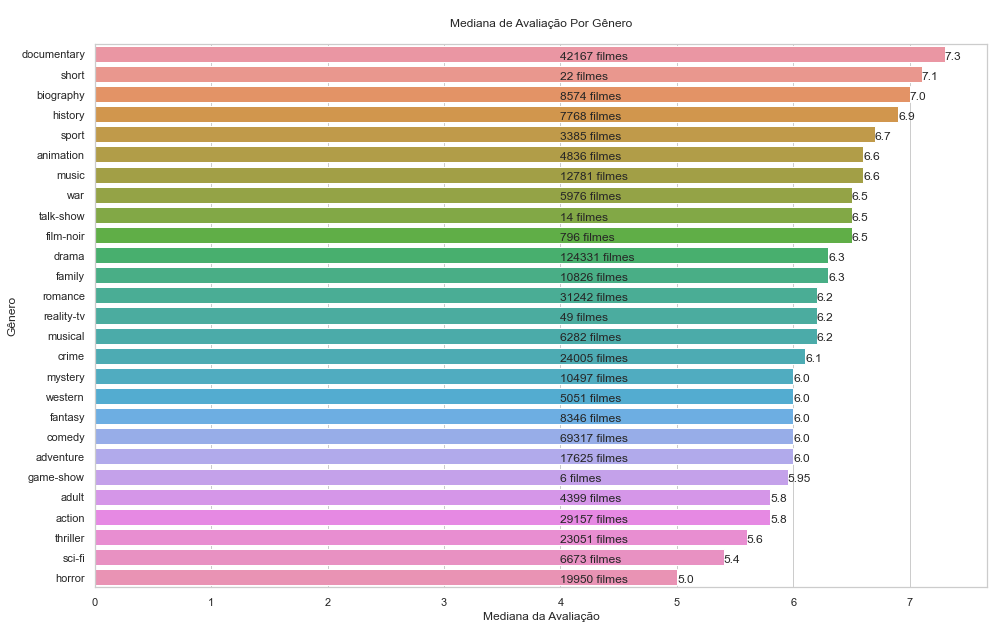

In [59]:
# Plot

# Figura
plt.figure(figsize = (16,10))

# Barplot
sns.barplot(y = df_genero_ratings.genres, x = df_genero_ratings.rating, orient = "h")

# Textos dos rótulos das barras do gráfico
for i in range(len(df_genero_ratings.index)):
    
    plt.text(4.0, 
             i + 0.25, 
             str(df_genero_ratings['count'][df_genero_ratings.index[i]]) + " filmes")
    
    plt.text(df_genero_ratings.rating[df_genero_ratings.index[i]],
             i + 0.25,
             round(df_genero_ratings["rating"][df_genero_ratings.index[i]],2))

plt.ylabel('Gênero')             
plt.xlabel('Mediana da Avaliação')
plt.title('\nMediana de Avaliação Por Gênero\n')
plt.show()

## 4- Qual a mediana de avaliação dos filmes em relação ao ano de estréia?

In [60]:
# Consulta SQL
consulta4 = '''
            SELECT rating AS Rating, premiered FROM 
            ratings JOIN titles ON ratings.title_id = titles.title_id 
            WHERE premiered <= 2022 AND type = 'movie'
            ORDER BY premiered
            ''' 

In [61]:
# Resultado
resultado4 = pd.read_sql_query(consulta4, conn)

In [62]:
display(resultado4)

,Rating,premiered
0,5.3,1894
1,6.7,1896
2,4.5,1897
3,4.0,1899
4,3.7,1899
...,...,...
280814,7.1,2022
280815,8.2,2022
280816,6.8,2022
280817,5.3,2022


In [63]:
# Calculamos a mediana ao longo do tempo (anos)
ratings = []
for year in set(resultado4['premiered']): #set() cria um conjunto
    ratings.append(np.median(resultado4[resultado4['premiered'] == year]['Rating']))

In [64]:
type(ratings)

list

In [65]:
ratings[1:10]

[6.7, 4.5, 3.85, 5.85, 6.2, 3.4, 4.6, 5.3, 4.55]

In [66]:
# Lista de anos
anos = list(set(resultado4['premiered'])) #set() cria um conjunto

In [67]:
anos[1:10]

[1896, 1897, 1899, 1900, 1901, 1902, 1903, 1904, 1905]

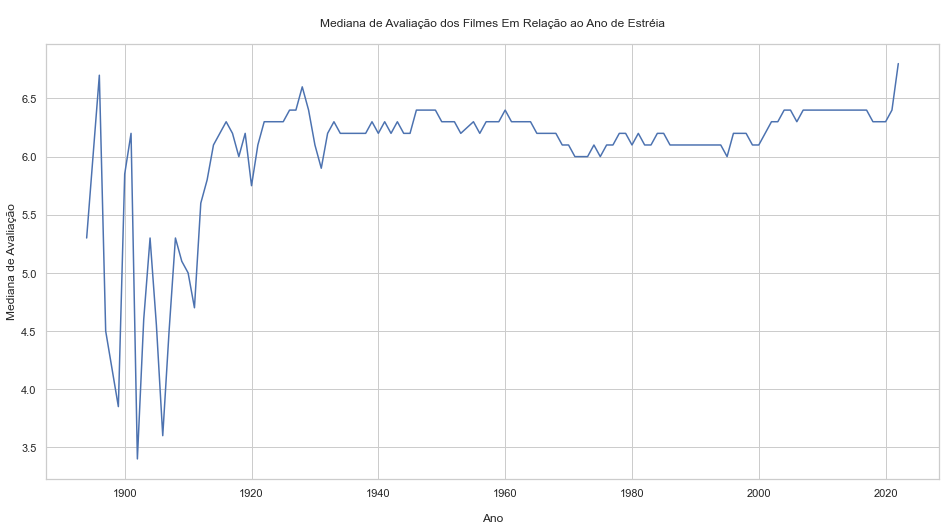

In [68]:
# Plot
plt.figure(figsize = (16,8))
plt.plot(anos, ratings)
plt.xlabel('\nAno')
plt.ylabel('Mediana de Avaliação')
plt.title('\nMediana de Avaliação dos Filmes Em Relação ao Ano de Estréia\n')
plt.show()

## 5- Qual o número de filmes avaliados por gênero em relação ao ano de estréia?

Número de filmes por gênero. Vamos listar os Top 5.

In [69]:
# Consulta SQL
consulta5 = '''SELECT genres FROM titles ''' 

In [70]:
# Resultado
resultado5 = pd.read_sql_query(consulta5, conn)

In [71]:
display(resultado5)

,genres
0,"Documentary,Short"
1,"Animation,Short"
2,"Animation,Comedy,Romance"
3,"Animation,Short"
4,"Comedy,Short"
...,...
9128045,"Action,Drama,Family"
9128046,"Action,Drama,Family"
9128047,"Action,Drama,Family"
9128048,Short


In [72]:
# Retorna gêneros únicos
generos_unicos = retorna_generos(resultado5)

In [73]:
# Visualiza o resultado
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [74]:
# Agora fazemos a contagem
genero_count = []
for item in generos_unicos:
    consulta = 'SELECT COUNT(*) COUNT FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND premiered <= 2022'
    resultado = pd.read_sql_query(consulta, conn)
    genero_count.append(resultado['COUNT'].values[0])

In [75]:
# Prepara o dataframe
df_genero_count = pd.DataFrame()
df_genero_count['genre'] = generos_unicos
df_genero_count['Count'] = genero_count

In [76]:
# Calcula os top 5
df_genero_count = df_genero_count[df_genero_count['genre'] != 'n'] #filtro para excluir 'n'
df_genero_count = df_genero_count.sort_values(by = 'Count', ascending = False) #ordenação ascedente
top_generos = df_genero_count.head()['genre'].values

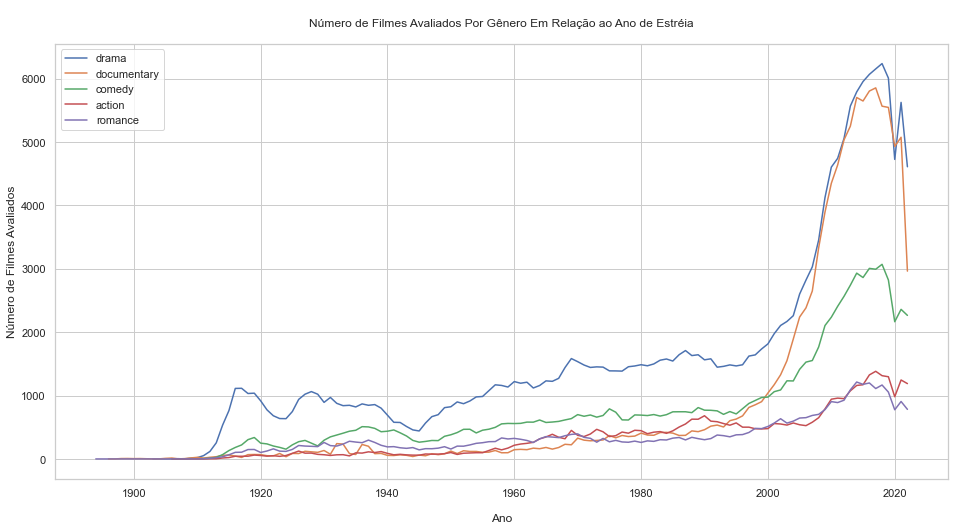

In [77]:
# Plot

# Figura
plt.figure(figsize = (16,8))

# Loop e Plot
for item in top_generos:
    consulta = 'SELECT COUNT(*) Number_of_movies, premiered Year FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Year <=2022 GROUP BY Year'
    resultado = pd.read_sql_query(consulta, conn)
    plt.plot(resultado['Year'], resultado['Number_of_movies'])

plt.xlabel('\nAno')
plt.ylabel('Número de Filmes Avaliados')
plt.title('\nNúmero de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia\n')
plt.legend(labels = top_generos)
plt.show()

## 6- Qual o filme com maior tempo de duração? Calcule os Percentis.

In [78]:
# Consulta SQL
consulta6 = '''
            SELECT runtime_minutes Runtime 
            FROM titles 
            WHERE type = 'movie' AND Runtime != 'NaN'
            ''' 

In [79]:
# Resultado
resultado6 = pd.read_sql_query(consulta6, conn)

In [80]:
display(resultado6)

,Runtime
0,45
1,100
2,70
3,90
4,120
...,...
389767,123
389768,57
389769,100
389770,116


In [81]:
# Loop para cálculo dos percentis
for i in range(101): 
    val = i
    perc = round(np.percentile(resultado6['Runtime'].values, val), 2)
    print('{} percentil da duração (runtime) é: {}'.format(val, perc))

0 percentil da duração (runtime) é: 1.0
1 percentil da duração (runtime) é: 45.0
2 percentil da duração (runtime) é: 47.0
3 percentil da duração (runtime) é: 50.0
4 percentil da duração (runtime) é: 50.0
5 percentil da duração (runtime) é: 51.0
6 percentil da duração (runtime) é: 52.0
7 percentil da duração (runtime) é: 53.0
8 percentil da duração (runtime) é: 55.0
9 percentil da duração (runtime) é: 56.0
10 percentil da duração (runtime) é: 57.0
11 percentil da duração (runtime) é: 58.0
12 percentil da duração (runtime) é: 60.0
13 percentil da duração (runtime) é: 60.0
14 percentil da duração (runtime) é: 60.0
15 percentil da duração (runtime) é: 61.0
16 percentil da duração (runtime) é: 62.0
17 percentil da duração (runtime) é: 64.0
18 percentil da duração (runtime) é: 65.0
19 percentil da duração (runtime) é: 67.0
20 percentil da duração (runtime) é: 69.0
21 percentil da duração (runtime) é: 70.0
22 percentil da duração (runtime) é: 70.0
23 percentil da duração (runtime) é: 71.0
24 

In [82]:
# Refazendo a consulta e retornando o filme com maior duração
consulta6 = '''
            SELECT runtime_minutes Runtime, primary_title
            FROM titles 
            WHERE type = 'movie' AND Runtime != 'NaN'
            ORDER BY Runtime DESC
            LIMIT 1
            ''' 

In [83]:
resultado6 = pd.read_sql_query(consulta6, conn)

In [84]:
resultado6

,Runtime,primary_title
0,51420,Logistics


'Logistics' é o filme mais longo da história (até este momento), com 857 horas (51420 minutos). Dirigido por Daniel Andersson e Erika Magnusson, o filme acompanha todo o ciclo de vida de um pedômetro (dispositivo de rastreamento de passos) em ordem cronológica reversa.

## 7- Qual a relação entre duração e gênero?

In [85]:
# Consulta SQL
consulta7 = '''
            SELECT AVG(runtime_minutes) Runtime, genres 
            FROM titles 
            WHERE type = 'movie'
            AND runtime_minutes != 'NaN'
            GROUP BY genres
            ''' 

In [86]:
# Resultado
resultado7 = pd.read_sql_query(consulta7, conn)

In [87]:
# Retorna gêneros únicos
generos_unicos = retorna_generos(resultado7)

In [88]:
# Visualiza
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [89]:
# Calcula duração por gênero
genero_runtime = []
for item in generos_unicos:
    consulta = 'SELECT runtime_minutes Runtime FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Runtime!=\'NaN\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_runtime.append(np.median(resultado['Runtime']))

In [90]:
# Prepara o dataframe
df_genero_runtime = pd.DataFrame()
df_genero_runtime['genre'] = generos_unicos
df_genero_runtime['runtime'] = genero_runtime

In [91]:
# Remove índice 18 (news)
df_genero_runtime = df_genero_runtime.drop(index = 18)

In [92]:
# Ordena os dados
df_genero_runtime = df_genero_runtime.sort_values(by = 'runtime', ascending = False)

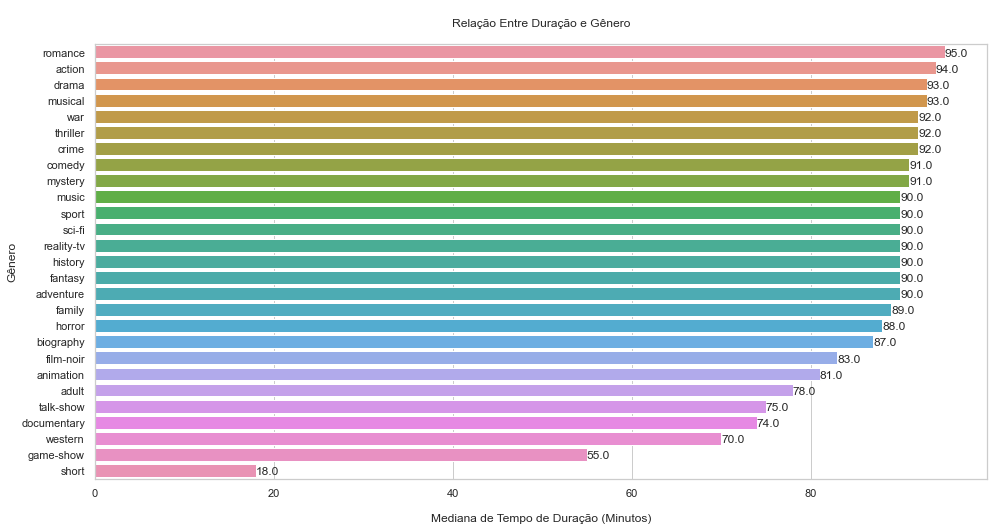

In [93]:
# Plot

# Tamanho da figura
plt.figure(figsize = (16,8))

# Barplot
sns.barplot(y = df_genero_runtime.genre, x = df_genero_runtime.runtime, orient = "h")

# Loop
for i in range(len(df_genero_runtime.index)):
    plt.text(df_genero_runtime.runtime[df_genero_runtime.index[i]],
             i + 0.25,
             round(df_genero_runtime["runtime"][df_genero_runtime.index[i]], 2))

plt.ylabel('Gênero')             
plt.xlabel('\nMediana de Tempo de Duração (Minutos)')
plt.title('\nRelação Entre Duração e Gênero\n')
plt.show()

## 8- Qual o número de filmes produzidos por país?

In [94]:
# Consulta SQL
consulta8 = '''
            SELECT region, COUNT(*) Number_of_movies FROM 
            akas JOIN titles ON 
            akas.title_id = titles.title_id
            WHERE region != 'None'
            AND type = \'movie\'
            GROUP BY region
            ''' 

In [95]:
# Resultado
resultado8 = pd.read_sql_query(consulta8, conn)

In [96]:
display(resultado8)

,region,Number_of_movies
0,AD,21
1,AE,6899
2,AF,114
3,AG,12
4,AL,1295
...,...,...
229,YUCS,153
230,ZA,7558
231,ZM,15
232,ZRCD,2


In [97]:
# Shape
resultado8.shape

(234, 2)

In [98]:
# Número de linhas
resultado8.shape[0]

234

In [99]:
# Listas auxiliares
nomes_paises = []
contagem = []

In [100]:
# Loop para obter o país de acordo com a região
for i in range(resultado8.shape[0]):
    try:
        coun = resultado8['region'].values[i]
        nomes_paises.append(pycountry.countries.get(alpha_2 = coun).name)
        contagem.append(resultado8['Number_of_movies'].values[i])
    except: 
        continue

In [101]:
# Prepara o dataframe
df_filmes_paises = pd.DataFrame()
df_filmes_paises['country'] = nomes_paises
df_filmes_paises['Movie_Count'] = contagem

In [102]:
# Ordena o resultado
df_filmes_paises = df_filmes_paises.sort_values(by = 'Movie_Count', ascending = False)

In [103]:
# Visualiza
df_filmes_paises.head(10)

,country,Movie_Count
199,United States,315466
65,United Kingdom,160744
96,Japan,92677
63,France,85822
89,India,84679
32,Canada,80570
47,Germany,72175
58,Spain,66788
26,Brazil,66285
93,Italy,66257


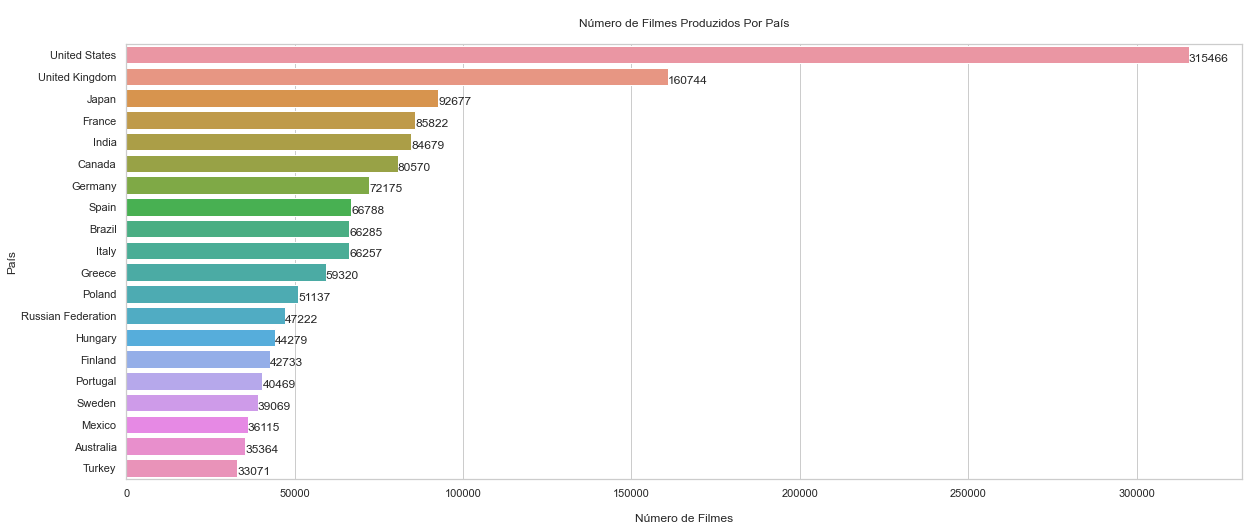

In [104]:
# Plot

# Figura
plt.figure(figsize = (20,8))

# Barplot
sns.barplot(y = df_filmes_paises[:20].country, x = df_filmes_paises[:20].Movie_Count, orient = "h")

# Loop
for i in range(0,20):
    plt.text(df_filmes_paises.Movie_Count[df_filmes_paises.index[i]]-1,
             i + 0.30,
             round(df_filmes_paises["Movie_Count"][df_filmes_paises.index[i]],2))

plt.ylabel('País')             
plt.xlabel('\nNúmero de Filmes')
plt.title('\nNúmero de Filmes Produzidos Por País\n')
plt.show()

## 9- Quais são os Top 10 Melhores Filmes?

In [105]:
# Consulta SQL
consulta9 = '''
            SELECT primary_title AS Movie_Name, genres, rating
            FROM 
            titles JOIN ratings
            ON  titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 25000
            ORDER BY rating DESC
            LIMIT 10          
            ''' 

In [106]:
# Resultado
top10_melhores_filmes = pd.read_sql_query(consulta9, conn)

In [107]:
display(top10_melhores_filmes)

,Movie_Name,genres,rating
0,The Shawshank Redemption,Drama,9.3
1,The Godfather,"Crime,Drama",9.2
2,The Chaos Class,"Comedy,Drama",9.2
3,CM101MMXI Fundamentals,"Comedy,Documentary",9.1
4,Rocketry: The Nambi Effect,"Biography,Drama",9.1
5,12 Angry Men,"Crime,Drama",9.0
6,The Godfather Part II,"Crime,Drama",9.0
7,Schindler's List,"Biography,Drama,History",9.0
8,The Lord of the Rings: The Return of the King,"Action,Adventure,Drama",9.0
9,The Dark Knight,"Action,Crime,Drama",9.0


## 10- Quais são os Top 10 Piores Filmes?

In [108]:
# Consulta SQL
consulta10 = '''
            SELECT primary_title AS Movie_Name, genres, rating
            FROM 
            titles JOIN ratings
            ON  titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 25000
            ORDER BY rating ASC
            LIMIT 10
            ''' 

In [109]:
# Resultado
top10_piores_filmes = pd.read_sql_query(consulta10, conn)

In [110]:
display(top10_piores_filmes)

,Movie_Name,genres,rating
0,Reis,"Biography,Drama",1.0
1,Cumali Ceber,Comedy,1.0
2,Sadak 2,"Action,Drama",1.1
3,Smolensk,"Drama,Thriller",1.2
4,Superbabies: Baby Geniuses 2,"Comedy,Family,Sci-Fi",1.5
5,The Cost of Deception,"Crime,Drama,History",1.5
6,Manos: The Hands of Fate,Horror,1.6
7,Justin Bieber: Never Say Never,"Documentary,Music",1.6
8,From Justin to Kelly,"Comedy,Musical,Romance",1.9
9,The Hottie & the Nottie,"Comedy,Romance",1.9


# Fim